In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [8]:
def quantum_half_adder():
    # Create quantum and classical registers

    qc = QuantumCircuit(4, 2)

    # Initialize qubits
    #qc.x(0)  # q[0] = 1 (preparamos q[1] en el estado |1⟩)
    qc.x(1)  # q[1] = 1 (preparamos q[1] en el estado |1⟩)
    
    qc.cx(0, 2) #CNOT gate Control-NOT
    qc.cx(1, 2)

    qc.ccx(0, 1, 2) #Toffoli gate CCNOT (Control-Control-NOT)
    qc.ccx(0, 1, 3)
    
    qc.measure([2, 3], [0, 1]) 

    return qc

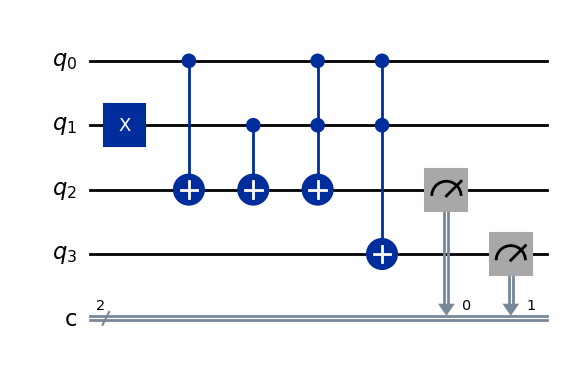

Measurement results: {'01': 1}


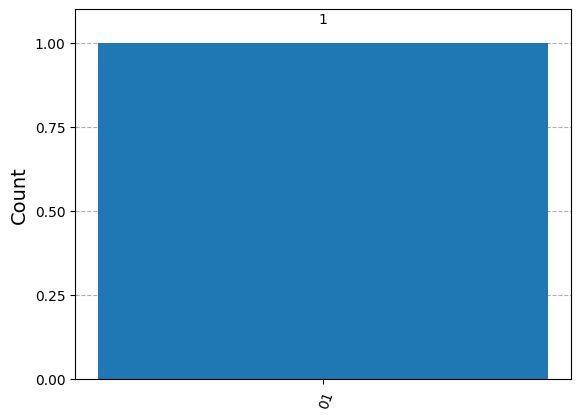

In [9]:
# Create and run the circuit
qc = quantum_half_adder()
display(qc.draw(output='mpl'))

simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1)
result = job.result()

# Get and display the results
counts = result.get_counts(qc)
print("Measurement results:", counts)

# Visualize the results
display(plot_histogram(counts))